In [ ]:
def stepwise_iterations(n,k, forward=True):
    if forward:
        return sum(n-i for i in range(k))
    else:
        return sum(n-i for i in range(n-k))
    
def iter_count(heuristic, n, k):
    if "Variable Flooring" in heuristic:
        return 1
    elif "Backward Stepwise Regression" in heuristic:
        return stepwise_iterations(n,k, forward=False)
    else:
        return stepwise_iterations(n,k, forward=True)
    
import math
def possible_solutions(n,k):
    return math.comb(n,k)

def possible_tree_size(n,k):
    return 2 * math.comb(n,k) - 1
    
print(f"{stepwise_iterations(500,10):,}")
print(f"{stepwise_iterations(500,10,forward=False):,}")
print(f"{possible_solutions(500,10):,}")
print(f"{possible_tree_size(500,10):,}")

999
125,247
245,810,588,801,891,098,700
491,621,177,603,782,197,399


NameError: name 'possible_solutions' is not defined

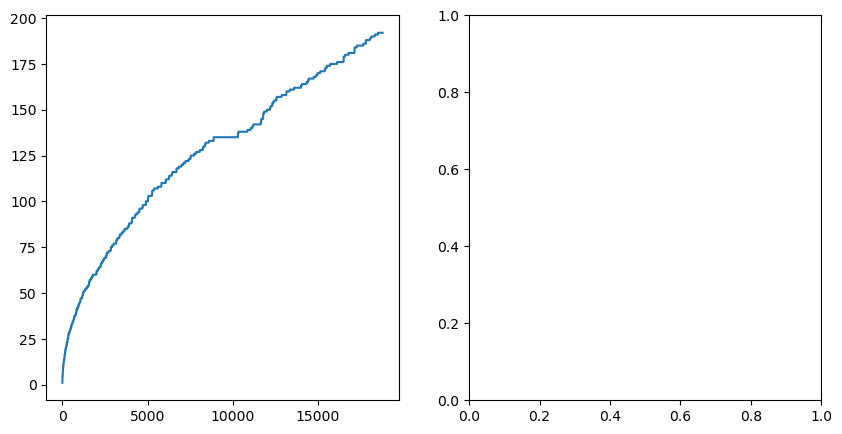

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# For Madelon n = 500
k_vals = []
iteration_count = []
solution_fraction = []

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

n=500
for k in sorted(range(2,3), reverse=True):
    actual_data = pd.read_csv(f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/test_data/test_MADELON_MOSEK_Most Fractional_Variable Flooring l2_{k}.csv")
    


    ax[0].plot(actual_data["iteration"], actual_data["num_subproblems"], label=str(k))
    k_vals.append(k)
    iteration_count.append(actual_data['iteration'].max())
    solution_fraction.append(actual_data['iteration'].max() / possible_solutions(n,k))
    
    #break

    
fig.show()

plt.plot(k_vals, iteration_count)
plt.show()

plt.plot(k_vals, solution_fraction)
plt.show()



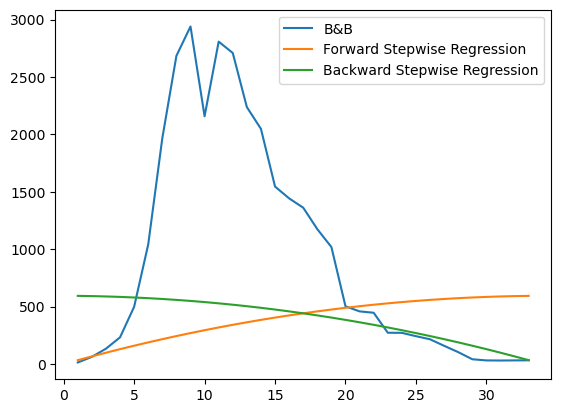

In [24]:

import pandas as pd
import matplotlib.pyplot as plt

# For Ionosphere n = 34

n=34

k_vals = []
solve_iters = []
forward_solve_iters = []
backward_solve_iters = []

for k in sorted(range(1,34), reverse=True):
    actual_data = pd.read_csv(f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/test_data/test_IONOSPHERE_MOSEK_Least Fractional_No Heuristic_{k}.csv")
    k_vals.append(k)
    solve_iters.append(actual_data['iteration'].max())
    forward_solve_iters.append(stepwise_iterations(n,k))
    backward_solve_iters.append(stepwise_iterations(n,k,forward=False))
    # print(heuristic_data.head())
    # print(actual_data.head())
    
#     plt.plot(actual_data["iteration"], (actual_data["UB"] - actual_data["LB"]) / actual_data["LB"], label = f"{k}")

# plt.legend()
# plt.show()


    
plt.plot(k_vals, solve_iters, label="B&B")
plt.plot(k_vals, forward_solve_iters, label="Forward Stepwise Regression")
plt.plot(k_vals, backward_solve_iters, label="Backward Stepwise Regression")
plt.legend()
plt.show()



(17530,)
(17530,)
nan


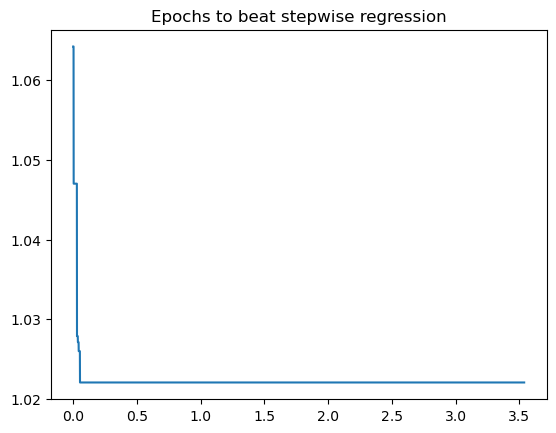

In [21]:

import pandas as pd
import matplotlib.pyplot as plt

# For Ionosphere n = 34

n=34

k_vals = []
forward_solve_epochs = []
backward_solve_epochs = []

for k in sorted(range(10,11), reverse=True):
    actual_data = pd.read_csv(f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/test_data/test_MADELON_MOSEK_Most Fractional_Variable Flooring l2_{k}.csv")
    # heuristic_data = pd.read_csv(f"/Users/jamesjones/Research_Weijun/LogRegpy/tests/heuristic_test_data/IONOSPHERE_{k}")
    # heuristic_data['Iterations'] = heuristic_data["Heuristic"].apply(lambda h: iter_count(h, n=n, k=k))
    k_vals.append(k)

    # for i,row in heuristic_data.iterrows():
    #     if row["Heuristic"] == "Backward Stepwise Regression No Penalty":
    #         backward_solve_epochs.append(actual_data[actual_data["UB"] <= row["UB"]]["iteration"].min() / row["Iterations"])
    #     elif row["Heuristic"] == "Forward Stepwise Regression No Penalty":
    #         if actual_data["UB"].min() < row["UB"]:
    #             forward_solve_epochs.append(actual_data[actual_data["UB"] <= row["UB"]]["iteration"].min() / row["Iterations"])
    #         else:
    #             forward_solve_epochs.append(actual_data["iteration"].max() / row["Iterations"])
    
    shifted_UB = actual_data["UB"] / 1297.4265424094892
    print(shifted_UB.shape)
    
    shifted_iter = actual_data["iteration"] / stepwise_iterations(500,10)
    print(shifted_iter.shape)

    print(actual_data[actual_data["UB"] <= 1297.4265424094892]["iteration"].min())
    
    plt.plot(shifted_iter, shifted_UB)

    # print(heuristic_data.head())
    # print(actual_data.head())
    
#     plt.plot(actual_data["iteration"], (actual_data["UB"] - actual_data["LB"]) / actual_data["LB"], label = f"{k}")

# plt.legend()
# plt.show()

    
plt.title("Epochs to beat stepwise regression")
plt.show()

